In [19]:
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
import sympy
from sympy.geometry import Point, Line

---

__max $Z(x_1,x_2)=-3x_1+2x_2$ in $\mathbb{R}^2$__<br>

$g_1(x_1,x_2)=-4x_1+7x_2\leq28$ or $x_2\leq\frac{4x_1+28}{7}$<br>
$g_2(x_1,x_2)=-5x_1-2x_2\leq10$ or $x_2\geq\frac{5x_1+10}{-2}$<br>
$g_3(x_1,x_2)=-6x_1+4x_2\geq-12$ or $x_2\geq\frac{6x_1-12}{4}$<br>
$g_4(x_1,x_2)=-x_1-x_2\geq-8$ or $x_2\leq-x_1+8$<br>

$\nabla Z=(-3,2)$<br>
$\nabla g_1=(-4,7)$<br>
$\nabla g_2=(-5,-2)$<br>
$\nabla g_3=(-6,4)$<br>
$\nabla g_4=(-1,-1)$<br>

$v_1=(7,4)$<br>
$v_2=(-2,5)$<br>
$v_3=(4,6)$<br>
$v_4=(-1,1)$<br>

directional derivatives<br>
$\nabla Z\cdot v_1=-3\cdot7+2\cdot4<0\rightarrow$ decreasing<br>
$\nabla Z\cdot v_2=-3\cdot-2+2\cdot5>0\rightarrow$ increasing<br>
$\nabla Z\cdot v_3=-3\cdot4+2\cdot6=0\rightarrow$ level set<br>
$\nabla Z\cdot v_4=-3\cdot-1+2\cdot1>0\rightarrow$ increasing<br>

argmax$_{\Gamma}(f)=$<br>
max$_{\Gamma}(f)=$<br>

Optimal Set:	(-2.93, 2.33)
Optimal Value:	13.44


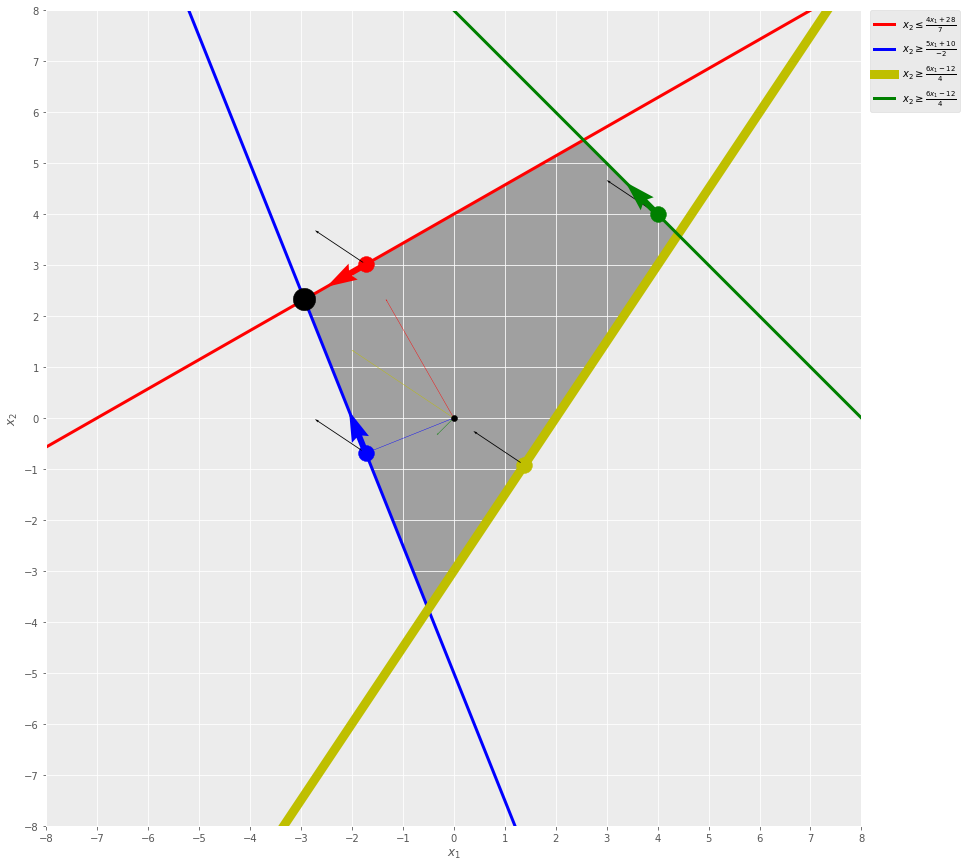

In [153]:
# X1
x = np.linspace(-10, 10, 1001)
# X2 linear constraint boundaries in standard form
g1=(4*x+28)/7
g2=(5*x+10)/-2
g3=(6*x-12)/4
g4=-(x-8)

# direction vectors
v1=-(7/4)*x
v2=(2/5)*x
v3=(4/6)*x
#v4=



def get_intersection (a, b, c, d):
    """Compute the xy-coordinates of the intersection of two linear constraints."""
    l1=Line(Point(a), Point(b))
    l2=Line(Point(c), Point(d))
    intersection=l1.intersection(l2)[0]
    return sympy.Float(intersection[0]), sympy.Float(intersection[1])

def plot_constraint (x, g, delg, intercept, delz, lw, l, qw, qs, ps, c):
    """Draw a single linear constraint."""
    
    # draw the gradient vector of the linear constraint from the origin
    plt.quiver(0, 0, delg[0], delg[1], width=qw, scale=qs, scale_units='xy', color=c);
    
    # compute the intersection of the linear constraint boundary and the path of its gradient vector
    a, b = get_intersection((0, intercept), (delg[1], -delg[0] + intercept), (0, 0), (delg[0], delg[1]))
    
    # draw the point of intersection
    plt.scatter(a, b, s=ps, color=c);
    
    # draw the gradient vector of the objective function
    plt.quiver(np.float(a), np.float(b), delz[0], delz[1], width=2*qw, scale=qs, scale_units='xy', color='black');
    
    # determine and draw the direction of maximization of the objective function along the linear constraint boundary
    dd1, dd2 = np.dot(np.array(delz), np.array([-delg[1], delg[0]])), np.dot(np.array(delz), np.array([delg[1], -delg[0]]))
    if dd1 > dd2:
        plt.quiver(np.float(a), np.float(b), -delg[1], delg[0], color=c);
        # draw the linear constraint boundary
        plt.plot(x, g, linewidth=lw, label=l, color=c);
    elif dd2 > dd1:
        plt.quiver(np.float(a), np.float(b), delg[1], -delg[0], color=c);
        # draw the linear constraint boundary
        plt.plot(x, g, linewidth=lw, label=l, color=c);
    else:
        # draw the linear constraint boundary
        plt.plot(x, g, linewidth=3*lw, label=l, color=c);
        


# plotting parameters
plt.figure(figsize=(15,15))
lw=3                        # constraint boundary linewdith
qw=0.0005                   # gradient vector width
qs=3                        # gradient vector scale
ps=250                      # point size

# draw g1
plot_constraint(x, g1, (-4, 7), 4, (-3, 2), lw, r'$x_2\leq\frac{4x_1+28}{7}$', qw, qs, ps, 'r')
# draw g2
plot_constraint(x, g2, (-5, -2), -5, (-3, 2), lw, r'$x_2\geq\frac{5x_1+10}{-2}$', qw, qs, ps, 'b')
# draw g3
plot_constraint(x, g3, (-6, 4), -3, (-3, 2), lw, r'$x_2\geq\frac{6x_1-12}{4}$', qw, qs, ps, 'y')
# draw g4
plot_constraint(x, g4, (-1, -1), 8, (-3, 2), lw, r'$x_2\geq\frac{6x_1-12}{4}$', qw, qs, ps, 'g')



# determine and draw the optimal set
argmax_x1, argmax_x2 = get_intersection((0, 4), (7, 8), (0, -5), (2, -10))
plt.scatter(argmax_x1, argmax_x2, s=2*ps, color='black', zorder=100);

# compute the optimal value
optZ = -3*argmax_x1 + 2*argmax_x2

print("Optimal Set:\t({}, {})".format(round(argmax_x1, 2), round(argmax_x2, 2)))
print("Optimal Value:\t{}".format(round(optZ, 2)))



# more plotting config

# draw the origin
plt.scatter(0, 0, color='black');

# plotting of the feasible set
d = np.linspace(-10, 10, 1001)
x, y = np.meshgrid(d, d)
plt.imshow(((7*y<=4*x+28) & (-2*y<=5*x+10) & (4*y>=6*x-12) & (-y>=x-8)).astype(int),
           extent=(x.min(), x.max(), y.min(), y.max()),
           origin='lower',
           cmap="Greys",
           alpha=0.3);

# figure
xmin, xmax = -8,8
ymin, ymax = -8,8
d = 1
plt.xlim((xmin, xmax))
plt.xticks(np.arange(xmin, xmax + d, d))
plt.ylim((ymin, ymax))
plt.yticks(np.arange(ymin, ymax + d, d))

# labels
plt.xlabel('$x_1$');
plt.ylabel('$x_2$');
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.);

#plt.grid(False); # remove gridlines

---